In [1]:
import numpy as np 
import pandas as pd 
import os
import operator
#import gc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import describe
%matplotlib inline

from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from keras.callbacks import ReduceLROnPlateau,EarlyStopping
from sklearn import svm
from sklearn import svm


from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import xgboost as xgb
import xgboost as xgb
from sklearn.model_selection import train_test_split

d:\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
print(os.listdir("../Costa Rica Poverty"))

['.ipynb_checkpoints', 'Costa Rica poverty-Copy1.ipynb', 'Costa Rica poverty.ipynb', 'data', 'poverty_submission.csv', 'simple_lgbm_1.csv']


In [3]:
path='../Costa Rica Poverty'

## Read data

In [4]:
train_df = pd.read_csv(path+ '/data/train.csv')
train_df.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [5]:
train_df.shape

(9557, 143)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [7]:
train_df.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,...,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,...,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.588867,1643.774302,3.302292
std,1.504571e+05,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.763131,0.680779,1.036574,...,76.777549,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,93.516890,1741.197050,1.009565
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,1.000000
25%,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,16.000000,289.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,289.000000,3.000000
50%,1.300000e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,36.000000,961.000000,16.000000,36.000000,1.000000,2.250000,0.444444,81.000000,961.000000,4.000000
75%,2.000000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,2.000000,...,121.000000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,134.560010,2601.000000,4.000000
max,2.353477e+06,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,8.000000,...,441.000000,9409.000000,169.000000,441.000000,81.000000,36.000000,64.000000,1369.000000,9409.000000,4.000000


In [8]:
#Looking for nulls

In [9]:
print('5 colmuns have NaN')
print()
is_null_train = train_df.isnull().any()
print('Number of NaN values')
print(train_df.isnull().loc[:,is_null_train==True].sum())


5 colmuns have NaN

Number of NaN values
v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64


In [10]:
test_df = pd.read_csv(path+ '/data/test.csv')
test_df.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [11]:
test_df.shape

(23856, 142)

In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


In [13]:
test_df.describe()


,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
count,6.453000e+03,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,5730.000000,23856.000000,23856.000000,...,23856.000000,23856.00000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23825.000000,23856.000000
mean,1.748726e+05,0.050679,4.955776,0.028421,0.992748,0.961603,0.240191,1.348517,0.416541,1.563967,...,34.454183,74.44974,1657.798080,19.113389,54.087232,3.885480,3.564751,4.171669,100.509220,1657.798080
std,1.567887e+05,0.219346,1.539753,0.166174,0.084850,0.192157,0.427208,0.694216,0.713255,0.990171,...,21.696245,76.99701,1753.603406,17.314597,77.312255,6.878967,6.668757,13.105989,89.211063,1753.603406
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.020408,0.000000,0.000000,0.000000
25%,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,16.000000,16.00000,256.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,256.000000
50%,1.400000e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,32.000000,36.00000,1024.000000,16.000000,36.000000,1.000000,2.250000,0.444444,75.111115,1024.000000
75%,2.200000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,1.750000,1.000000,2.000000,...,51.000000,121.00000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,132.250000,2601.000000
max,2.852700e+06,1.000000,15.000000,1.000000,1.000000,1.000000,1.000000,6.000000,6.000000,7.000000,...,97.000000,441.00000,9409.000000,169.000000,441.000000,100.000000,169.000000,64.000000,1296.000000,9409.000000


In [14]:
# Split train data
train_Id = train_df['Id'] # individual ID
train_idhogar = train_df['idhogar'] # household ID
train_y = train_df['Target'] # Target value
train_x = train_df.drop(['Id', 'Target', 'idhogar'], axis=1) # features
test_x = test_df.drop(['Id', 'idhogar'], axis=1) # features

In [15]:
print('Num of rows : {}'.format(train_df.shape[0]))
print('unique ID : {}'.format(train_Id.unique().size))
print('unique idhogar : {}'.format(train_idhogar.unique().size))

Num of rows : 9557
unique ID : 9557
unique idhogar : 2988


In [16]:
df = pd.concat([train_x, test_x], axis=0)

In [17]:
y = train_df['Target'].values#-1


In [18]:
y

array([4, 4, 4, ..., 2, 2, 2], dtype=int64)

In [19]:
df.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,190000.0,0,3,0,1,1,0,NaN,0,1,...,43,100,1849,1,100,0,1.000000,0.0,100.0,1849
1,135000.0,0,4,0,1,1,1,1.0,0,1,...,67,144,4489,1,144,0,1.000000,64.0,144.0,4489
2,NaN,0,8,0,1,1,0,NaN,0,0,...,92,121,8464,1,0,0,0.250000,64.0,121.0,8464
3,180000.0,0,5,0,1,1,1,1.0,0,2,...,17,81,289,16,121,4,1.777778,1.0,121.0,289
4,180000.0,0,5,0,1,1,1,1.0,0,2,...,37,121,1369,16,121,4,1.777778,1.0,121.0,1369


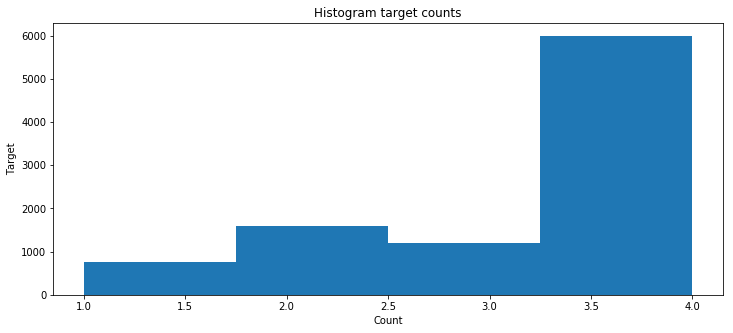

In [20]:
plt.figure(figsize=(12, 5))
plt.hist(train_y.values, bins=4)
plt.title('Histogram target counts')
plt.xlabel('Count')
plt.ylabel('Target')
plt.show()

In [21]:
print(df.dtypes.value_counts())

int64      129
float64      8
object       3
dtype: int64


In [22]:
df.dtypes[df.dtypes=='object']



dependency    object
edjefe        object
edjefa        object
dtype: object

In [23]:
print(df.dtypes.value_counts())

int64      129
float64      8
object       3
dtype: int64


In [24]:
print('dependency unique valuse')
print(df['dependency'].unique())
print()
print('edjefa unique valuse')
print(df['edjefa'].unique())
print()
print('edjefe unique valuse')
print(df['edjefe'].unique())

dependency unique valuse
['no' '8' 'yes' '3' '.5' '.25' '2' '.66666669' '.33333334' '1.5'
 '.40000001' '.75' '1.25' '.2' '2.5' '1.2' '4' '1.3333334' '2.25'
 '.22222222' '5' '.83333331' '.80000001' '6' '3.5' '1.6666666' '.2857143'
 '1.75' '.71428573' '.16666667' '.60000002' '.375' '.14285715' '.85714287'
 '.125' '2.3333333' '7' '3.3333333']

edjefa unique valuse
['no' '11' '4' '10' '9' '15' '7' '14' '13' '8' '17' '6' '5' '3' '16' '19'
 'yes' '21' '12' '2' '20' '18']

edjefe unique valuse
['10' '12' 'no' '11' '9' '15' '4' '6' '8' '17' '7' '16' '14' '5' '21' '2'
 '19' 'yes' '3' '18' '13' '20']


In [25]:
#Labels encoding

In [26]:
cols = [f_ for f_ in df.columns if df[f_].dtype == 'object']

In [27]:
for col in cols:
    le = LabelEncoder()
    le.fit(df[col].astype(str))
    df[col] = le.transform(df[col].astype(str))
    train_x[col] = le.transform(train_x[col].astype(str))
    test_x[col] = le.transform(test_x[col].astype(str))
del le

In [28]:
#train_df.dtypes[train_df.dtypes=='object']

In [29]:
#test_df.dtypes[test_df.dtypes=='object']

In [30]:
df.dtypes[df.dtypes=='object']

Series([], dtype: object)

In [31]:
df.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,190000.0,0,3,0,1,1,0,NaN,0,1,...,43,100,1849,1,100,0,1.000000,0.0,100.0,1849
1,135000.0,0,4,0,1,1,1,1.0,0,1,...,67,144,4489,1,144,0,1.000000,64.0,144.0,4489
2,NaN,0,8,0,1,1,0,NaN,0,0,...,92,121,8464,1,0,0,0.250000,64.0,121.0,8464
3,180000.0,0,5,0,1,1,1,1.0,0,2,...,17,81,289,16,121,4,1.777778,1.0,121.0,289
4,180000.0,0,5,0,1,1,1,1.0,0,2,...,37,121,1369,16,121,4,1.777778,1.0,121.0,1369


In [32]:
#train_df = train_df.drop(['Id', 'Target', 'idhogar'], axis=1) # features

In [33]:
#test_df = test_df.drop(['Id', 'idhogar'], axis=1) # features

In [34]:
# missing values?
df.isnull().sum()


v2a1               24263
hacdor                 0
rooms                  0
hacapo                 0
v14a                   0
refrig                 0
v18q                   0
v18q1              25468
r4h1                   0
r4h2                   0
r4h3                   0
r4m1                   0
r4m2                   0
r4m3                   0
r4t1                   0
r4t2                   0
r4t3                   0
tamhog                 0
tamviv                 0
escolari               0
rez_esc            27581
hhsize                 0
paredblolad            0
paredzocalo            0
paredpreb              0
pareddes               0
paredmad               0
paredzinc              0
paredfibras            0
paredother             0
                   ...  
instlevel9             0
bedrooms               0
overcrowding           0
tipovivi1              0
tipovivi2              0
tipovivi3              0
tipovivi4              0
tipovivi5              0
computer               0


In [35]:
#test_df.isnull().sum()


In [36]:
df.columns[df.isnull().any()].tolist()

['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'SQBmeaned']

In [37]:

#train_df[pd.isnull(train_df.SQBmeaned )]

In [38]:
#train_df[pd.isnull(train_df.meaneduc )]

In [39]:
train_x['v2a1'].fillna(train_x['v2a1'].median(), inplace = True)
train_x['v18q1'].fillna(train_x['v18q1'].median(), inplace = True)
train_x['rez_esc'].fillna(train_x['rez_esc'].median(), inplace = True)
train_x['SQBmeaned'].fillna(train_x['SQBmeaned'].median(), inplace = True)
train_x['meaneduc'].fillna(train_x['meaneduc'].median(), inplace = True)

In [40]:
test_x['v2a1'].fillna(test_x['v2a1'].median(), inplace = True)
test_x['v18q1'].fillna(test_x['v18q1'].median(), inplace = True)
test_x['rez_esc'].fillna(test_x['rez_esc'].median(), inplace = True)
test_x['SQBmeaned'].fillna(test_x['SQBmeaned'].median(), inplace = True)
test_x['meaneduc'].fillna(test_x['meaneduc'].median(), inplace = True)

In [41]:
test_x.dtypes[test_x.dtypes=='object']

Series([], dtype: object)

In [42]:
train_x.dtypes[train_x.dtypes=='object']

Series([], dtype: object)

In [43]:
train_x.sample(5)

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
2891,130000.0,0,4,0,1,1,0,1.0,0,1,...,60,121,3600,4,289,0,1.000000,0.000000,196.000000,3600
6009,140000.0,0,5,0,1,1,0,1.0,0,3,...,55,81,3025,16,81,0,1.777778,0.000000,110.250000,3025
5114,130000.0,0,4,0,1,1,0,1.0,0,3,...,19,144,361,25,81,4,6.250000,0.444444,186.777790,361
3963,130000.0,0,5,0,1,1,0,1.0,0,3,...,49,36,2401,25,36,4,2.777778,0.444444,87.111107,2401
2358,130000.0,1,6,0,1,1,0,1.0,0,2,...,28,36,784,16,0,4,11.111111,1.000000,36.000000,784


In [44]:
test_x.sample(10)

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
20193,140000.0,0,5,0,1,1,0,1.0,0,2,...,73,16,5329,9,16,0,2.250000,4.000000,21.777777,5329
20277,140000.0,0,8,0,1,1,0,1.0,0,3,...,15,81,225,25,0,4,1.000000,0.444444,300.444460,225
10079,140000.0,0,7,0,1,1,0,1.0,0,1,...,92,121,8464,9,121,0,2.250000,64.000000,121.000000,8464
11111,140000.0,0,8,0,1,0,1,3.0,1,1,...,15,64,225,25,289,9,2.777778,2.250000,256.000000,225
1095,140000.0,0,5,0,1,1,1,1.0,0,2,...,19,121,361,36,36,4,2.250000,0.250000,76.562500,361
14560,175000.0,0,4,0,1,1,0,1.0,2,1,...,26,121,676,49,0,16,5.444444,1.777778,144.000000,676
11145,140000.0,0,3,0,1,1,0,1.0,0,2,...,15,36,225,25,81,9,6.250000,2.250000,110.250000,225
18013,140000.0,0,5,0,1,1,0,1.0,1,1,...,25,121,625,16,36,1,1.777778,0.111111,87.111107,625
7480,140000.0,0,5,0,1,1,0,1.0,0,2,...,23,196,529,16,49,0,1.000000,0.111111,81.000000,529
14250,140000.0,0,5,0,1,1,0,1.0,0,2,...,32,225,1024,4,121,0,0.444444,0.000000,169.000000,1024


In [45]:
train_x.sample(10)

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
5299,130000.0,0,6,0,1,1,0,1.0,1,1,...,55,256,3025,4,256,1,0.444444,1.000000,256.000000,3025
1309,130000.0,0,5,0,1,1,1,1.0,0,1,...,36,36,1296,9,49,1,2.250000,0.250000,42.250000,1296
4795,130000.0,0,5,0,1,1,0,1.0,0,1,...,77,121,5929,1,121,0,0.111111,64.000000,121.000000,5929
1285,130000.0,0,5,0,1,1,0,1.0,0,1,...,21,121,441,16,64,1,1.777778,0.111111,69.444443,441
97,130000.0,0,4,0,1,1,0,1.0,1,2,...,30,64,900,25,0,4,6.250000,0.444444,36.000000,900
913,130000.0,0,4,0,1,1,0,1.0,0,1,...,1,0,1,16,49,4,4.000000,1.000000,64.000000,1
537,130000.0,0,7,0,1,1,1,1.0,1,2,...,2,0,4,36,0,9,1.440000,1.000000,49.000000,4
9301,25000.0,0,3,0,1,1,0,1.0,1,1,...,34,25,1156,9,25,1,2.250000,0.250000,49.000000,1156
4171,130000.0,0,8,0,1,1,0,1.0,0,4,...,28,81,784,25,0,0,0.694444,0.000000,121.000000,784
4394,72554.0,0,4,0,1,1,1,1.0,1,1,...,31,81,961,9,81,1,2.250000,0.250000,132.250000,961


In [46]:
#Predictions

In [47]:
train = lgb.Dataset(train_x ,feature_name = "auto")

In [48]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'metric': 'multi_logloss',
    'max_depth': 5,
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 5,
    'verbose': -1,
    'num_threads': 6,
    'lambda_l2': 1.0,
    'min_gain_to_split': 0,
    'num_class': len(np.unique(y)),
}

In [49]:
clf = lgb.train(params,
        train,
        num_boost_round = 500,
        verbose_eval=True)

In [50]:
clf = svm.SVC(gamma=0.001, C=100.)

In [51]:
clf.fit(train_x,y) 

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [52]:
pred_test_y = clf.predict(test_x)

In [53]:
preds = clf.predict(test_x)
preds = np.argmax(preds) +1
preds

1

In [54]:
sample_submission = pd.read_csv(path+"/data/sample_submission.csv")
sample_submission.head()


,Id,Target
0,ID_2f6873615,4
1,ID_1c78846d2,4
2,ID_e5442cf6a,4
3,ID_a8db26a79,4
4,ID_a62966799,4


In [55]:
sample_submission['Target'] = preds
sample_submission.to_csv('simple_lgbm_1.csv', index=False)
sample_submission.head()

,Id,Target
0,ID_2f6873615,1
1,ID_1c78846d2,1
2,ID_e5442cf6a,1
3,ID_a8db26a79,1
4,ID_a62966799,1


In [56]:
#Correlation with target

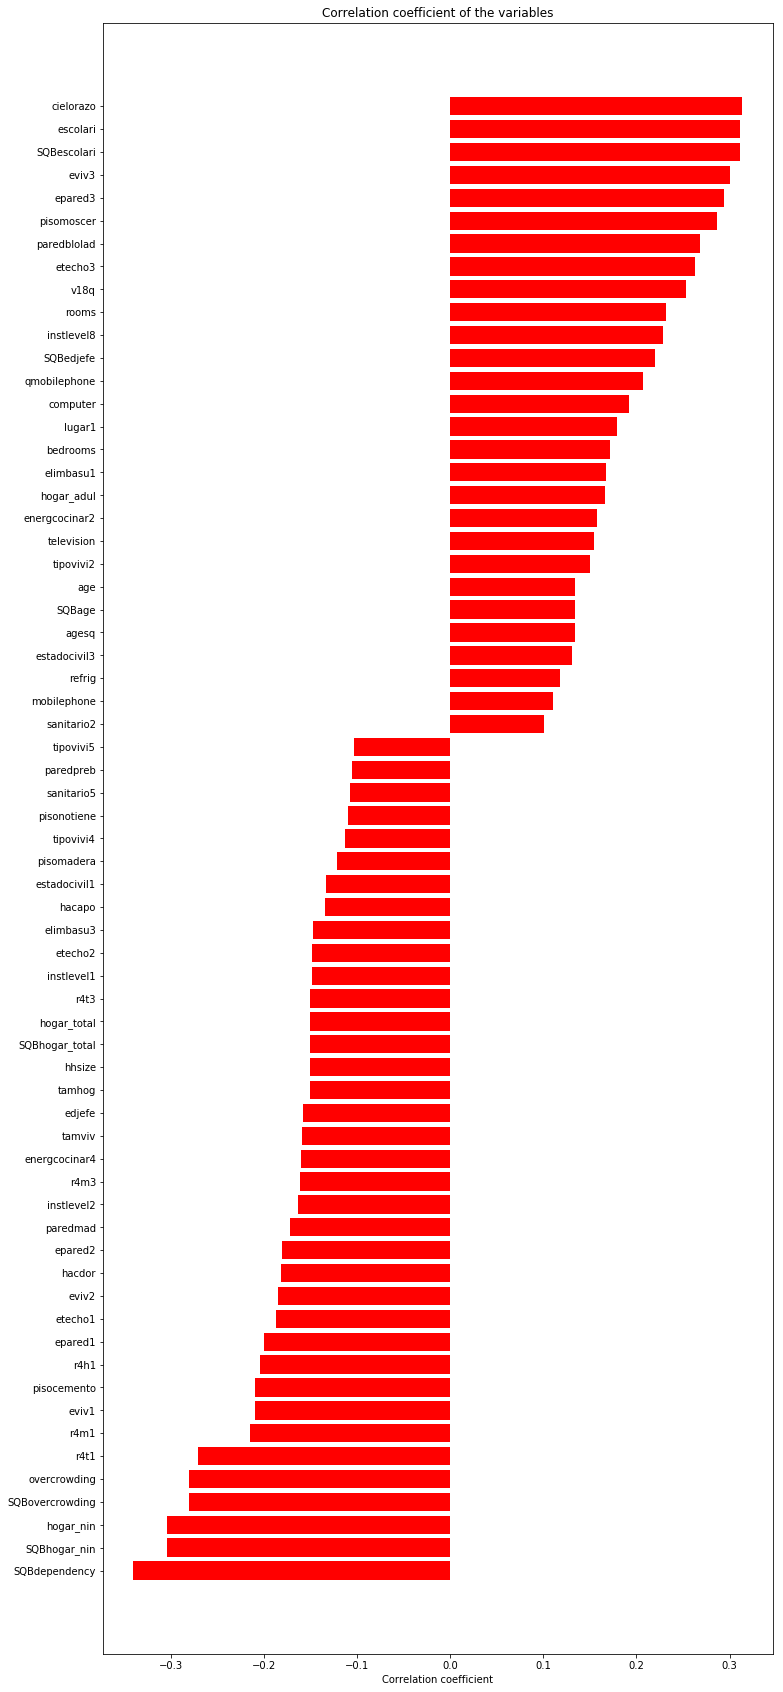

In [57]:
from scipy.stats import spearmanr
import warnings
warnings.filterwarnings("ignore")

labels = []
values = []
for col in df.columns:
    if col not in ["Id", "Target"]:
        labels.append(col)
        values.append(spearmanr(train_df[col].values, train_df["Target"].values)[0])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')
 
corr_df = corr_df[(corr_df['corr_values']>0.1) | (corr_df['corr_values']<-0.1)]
ind = np.arange(corr_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,30))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='red')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
plt.show()

In [58]:
#Correlation heatmap

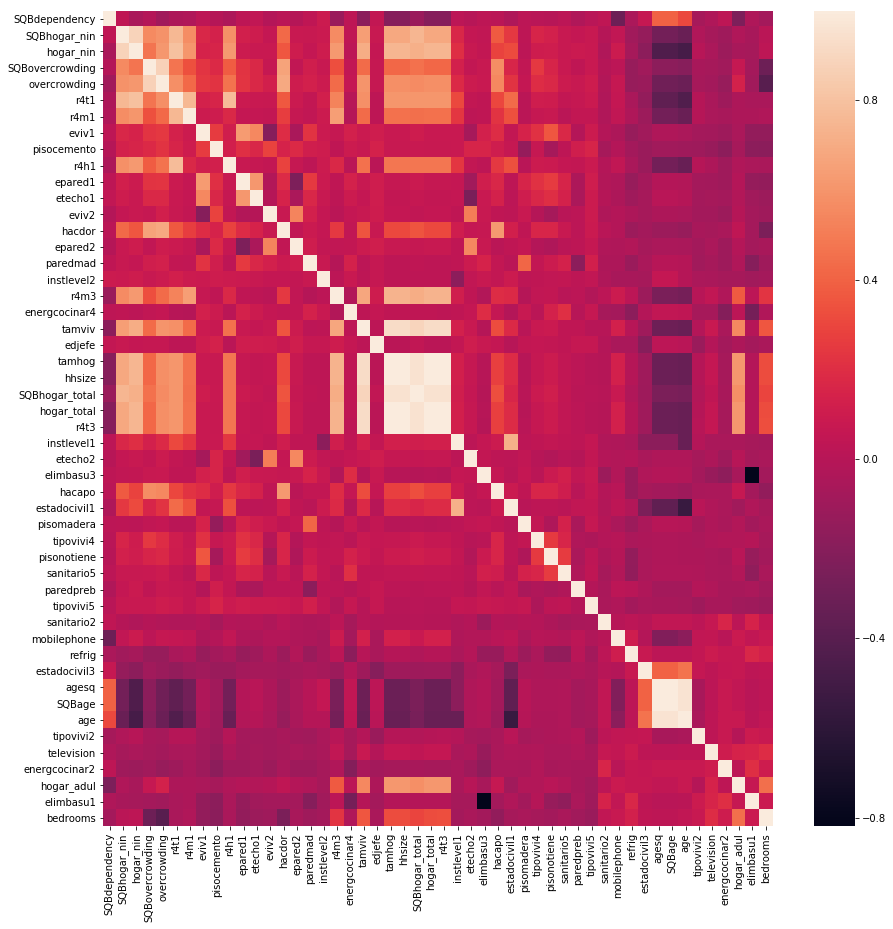

In [59]:
plt.figure(figsize=(15,15))
sns.heatmap(df[corr_df.col_labels[:50]].corr())

In [60]:
#Top 10 correlated

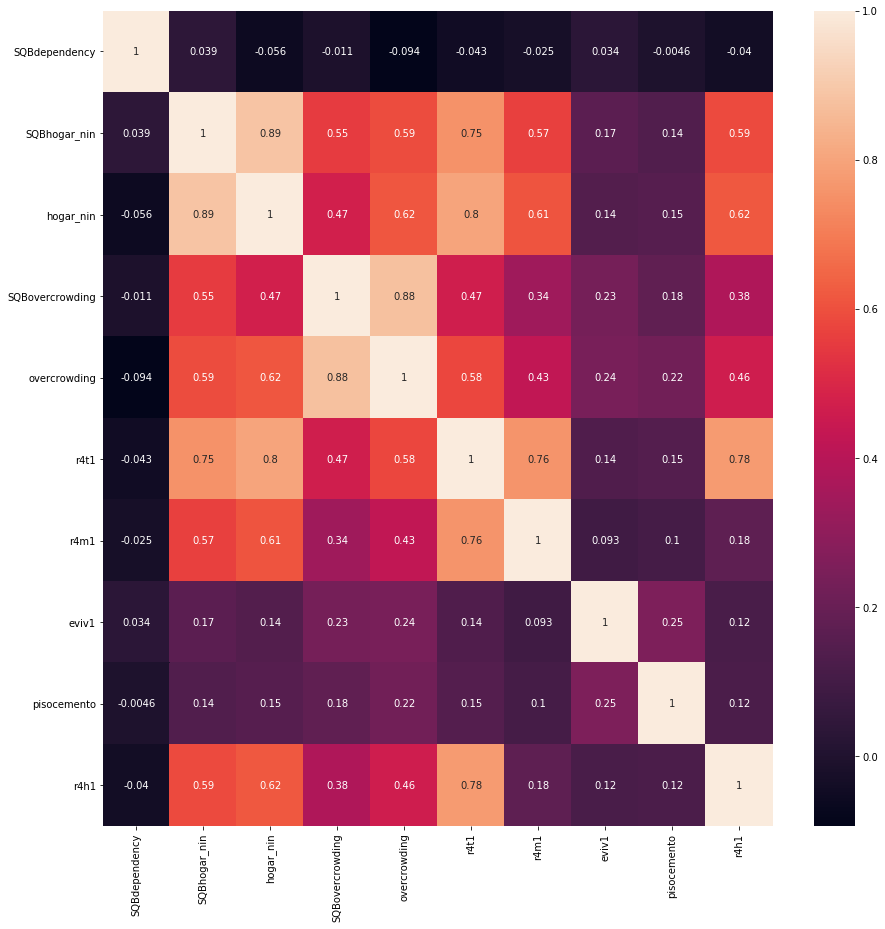

In [61]:
plt.figure(figsize=(15,15))
sns.heatmap(df[corr_df.col_labels[:10]].corr(), annot=True)

In [62]:
'''
Y = data_all['Target'].values
X = data_all.drop(columns=['v18q1', 'rez_esc', 'idhogar', 'dependency', 'edjefe',
                           'edjefa','meaneduc', 'Target', 'Id'],axis = 1)
Y = Y.astype('float32')
X = X.astype('float32')
scaler = MinMaxScaler(feature_range = (0,1))
X = X.values
X = scaler.fit_transform(X)
Y = pd.get_dummies(Y)
Y = Y.values
'''

"\nY = data_all['Target'].values\nX = data_all.drop(columns=['v18q1', 'rez_esc', 'idhogar', 'dependency', 'edjefe',\n                           'edjefa','meaneduc', 'Target', 'Id'],axis = 1)\nY = Y.astype('float32')\nX = X.astype('float32')\nscaler = MinMaxScaler(feature_range = (0,1))\nX = X.values\nX = scaler.fit_transform(X)\nY = pd.get_dummies(Y)\nY = Y.values\n"

### Try with neutral network

In [63]:
train_df = train_df.drop(['Id', 'Target', 'idhogar'], axis=1) # features

In [64]:
for col in cols:
    le = LabelEncoder()
    le.fit(train_df[col].astype(str))
    train_df[col] = le.transform(train_df[col].astype(str))
del le

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(
       train_df, y, test_size=0.33, random_state=42)

In [66]:
Y_train = np_utils.to_categorical(Y_train)  
Y_test = np_utils.to_categorical(Y_test)  

In [67]:
y.shape

(9557,)

In [68]:
train_df.shape

(9557, 140)

In [69]:
X_train.shape

(6403, 140)

In [70]:
X_test.shape

(3154, 140)

In [71]:
Y_train.shape

(6403, 5)

In [72]:
Y_test.shape

(3154, 5)

In [73]:
input_neurons=140

In [74]:
output_neurons=5

In [75]:
model = Sequential()
model.add(Dense(32, input_dim=input_neurons, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(512, activation='relu'))
model.add(Dense(output_neurons, activation = "softmax"))

model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", 
              metrics=["accuracy"])


In [76]:
history = model.fit(X_train, Y_train, validation_data=(X_test,Y_test),
                    epochs=50, batch_size=64)

Train on 6403 samples, validate on 3154 samples
Epoch 1/50


InternalError: Blas GEMM launch failed : a.shape=(64, 140), b.shape=(140, 32), m=64, n=32, k=140
	 [[Node: dense_1/MatMul = MatMul[T=DT_FLOAT, _class=["loc:@training/Adam/gradients/dense_1/MatMul_grad/MatMul_1"], transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](_arg_dense_1_input_0_0/_177, dense_1/kernel/read)]]
	 [[Node: metrics/acc/Mean/_209 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_1375_metrics/acc/Mean", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

In [ ]:
l = plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
print(l)

In [ ]:
# Accuracy Curves
a = plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
print(a)

In [ ]:
test_data = pd.read_csv('../input/test.csv')
test_data = test_data.fillna(test_data.mean())
ids = test_data['Id']
Xt = test_data.drop(columns=['v18q1', 'rez_esc', 'idhogar', 'dependency', 'edjefe',
                           'edjefa',	'meaneduc', 'Id'],axis = 1)
Xt = Xt.astype('float32')
Xt = Xt.values
Xt = scaler.fit_transform(Xt)
pred = model.predict(Xt)
covertype = [np.argmax(i)+1 for i in pred]
sub = pd.DataFrame({'Id':ids,'Target':covertype})
output = sub[['Id','Target']]
output.to_csv("output.csv",index = False)